# Just rewrite this entirely

In [21]:
%cd ../src/

/mnt/c/Users/Jacob/Desktop/prosjektoppgave/testing/gymming/src


In [23]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from concepts import concept_instances

In [24]:
ball_y = concept_instances['ball y']
print(ball_y.name)
actual_values = ball_y.get_values()
obs = ball_y.get_observations()
images = ball_y.get_images()
# select x random observations
random_indices = np.random.choice(len(obs), size=9000, replace=False)
obs = obs[random_indices]
actual_values = actual_values[random_indices]
images = images[random_indices]

ball low (c)


In [25]:
max(actual_values)

210

In [26]:
obs.shape

(9000, 4, 84, 84)

In [50]:
# create linear predictor on obs and actual values
obs_flatten = obs.copy().reshape(len(obs), -1)
X_train, X_test, y_train, y_test = train_test_split(obs_flatten, actual_values, test_size=0.2, random_state=0)
#reg = linear_model.Lasso(alpha=0.05)
reg = linear_model.ElasticNet(alpha=0.1, l1_ratio=0.1)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('R2 score: ', r2_score(y_test, y_pred))

R2 score:  0.6060028506158577


/mnt/c/Users/Jacob/Desktop/prosjektoppgave/testing/gymming/.conda/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.049e+05, tolerance: 7.786e+02
  model = cd_fast.enet_coordinate_descent(


In [51]:
print(max(y_pred))
print(min(y_pred))

228.16394450394847
-36.17136156426369


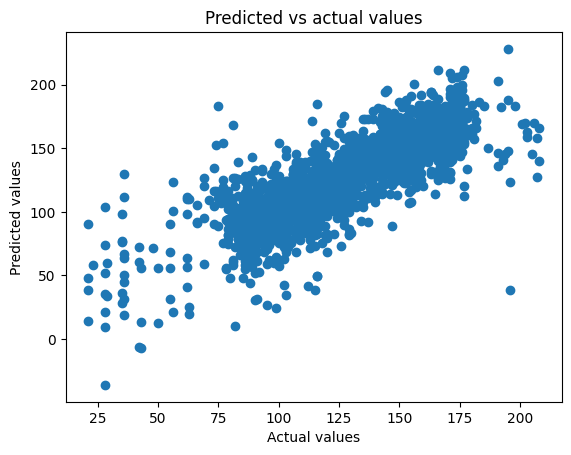

In [52]:
# plot pred vs actual
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predicted vs actual values')
plt.show()

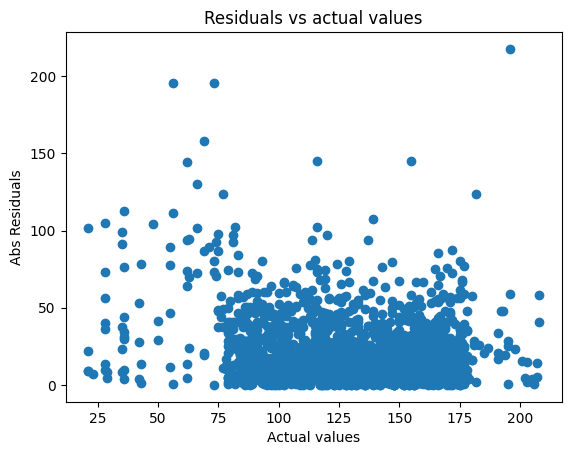

In [33]:
# plot residuals
residuals = abs(y_test - y_pred)
plt.scatter(y_test, residuals)
plt.xlabel('Actual values')
plt.ylabel('Abs Residuals')
plt.title('Residuals vs actual values')
plt.show()

(9000, 4, 84, 84)
diff:  141.32690353134075


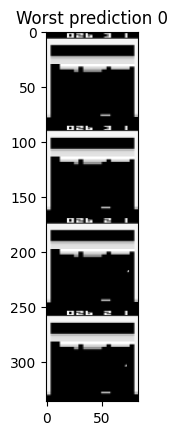

diff:  148.83585944963534


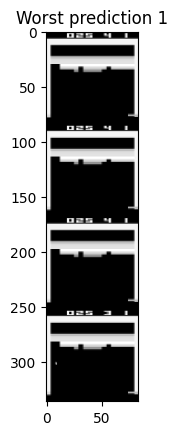

diff:  152.09538028316751


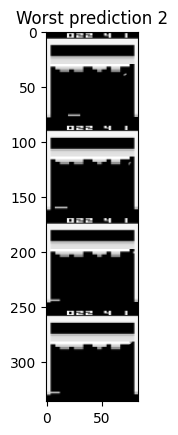

diff:  157.17504274645677


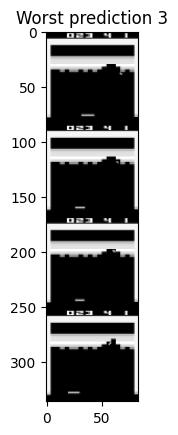

diff:  323.7170923313586


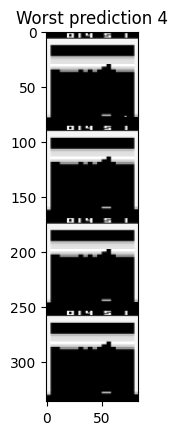

(9000, 4, 84, 84)


In [11]:
print(obs.shape)
# get the 5 worst predictions
diff = np.abs(y_test - y_pred)
worst_indices = np.argsort(diff)[-5:]
worst_obs = X_test[worst_indices]
# plot the worst predictions (as observations)
for i in range(len(worst_obs)):
    print('diff: ', diff[worst_indices[i]])
    x = worst_obs[i].reshape(-1, 84)
    plt.imshow(x, cmap='gray')
    plt.title('Worst prediction ' + str(i))
    plt.show()
print(obs.shape)

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
q_network = load_model("../runs/20230920-221924/models/model_10000000.pt").to(device)
layer = 5
# add hook to layer
def get_layer_output(m, i, o):
    global layer_output
    if len(o.shape) > 1:
        # flatten all but first dimension (so it works on conv layers)
        print(o.shape)
        o = o.flatten(start_dim=1)
    layer_output = o

q_network.network[layer].register_forward_hook(get_layer_output)

In [13]:
# forward pass obs
obs = torch.from_numpy(obs).float().to(device)
q_network(obs)

torch.Size([9000, 64, 7, 7])


tensor([[ 5.1668,  5.1540,  5.1267,  5.1344],
        [10.2192, 10.2295, 10.3312, 10.2009],
        [ 7.0049,  6.9860,  7.0210,  7.0042],
        ...,
        [ 4.9076,  4.9136,  4.9164,  4.8965],
        [ 6.5528,  6.5568,  6.5629,  6.5091],
        [ 5.3151,  5.2889,  5.2849,  5.2844]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [14]:
activations = layer_output.cpu().detach().numpy()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(activations, actual_values, test_size=0.2, random_state=0)

In [16]:
# train linear model on activations
reg = linear_model.Ridge(alpha=2.0)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('R2 score: ', r2_score(y_test, y_pred))

R2 score:  0.9234551671035806


In [17]:
print(max(y_pred))
print(min(y_pred))

197.00342
2.298706


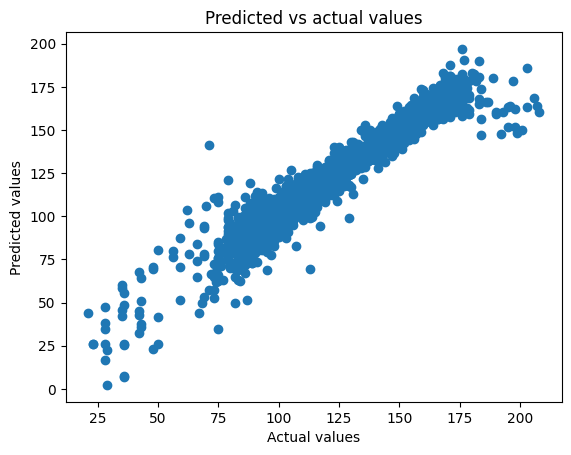

In [18]:
# plot pred vs actual
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predicted vs actual values')
plt.show()

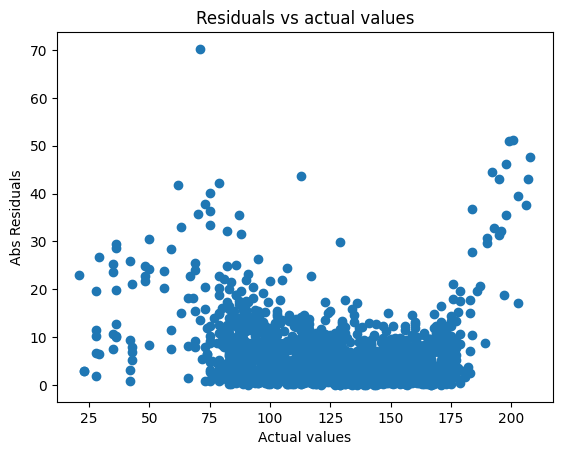

In [19]:
# plot residuals
residuals = abs(y_test - y_pred)
plt.scatter(y_test, residuals)
plt.xlabel('Actual values')
plt.ylabel('Abs Residuals')
plt.title('Residuals vs actual values')
plt.show()